In [17]:
import random
import numpy as np
import matplotlib.pyplot as plt
import time

# Configuração do AG (Atividade 6)
POP_SIZE = 50
GERACOES = 400
TX_CROSSOVER = 0.90
TX_MUTACAO = 0.05
TAMANHO_TORNEIO = 3
ELITISMO_SIZE = 5
NUM_EXECUCOES = 30

# Dados do Problema (TSP-13 cidades

# 0: New York, 1: Los Angeles, 2: Chicago, 3: Minneapolis, 4: Denver,
# 5: Dallas, 6: Seattle, 7: Boston, 8: San Francisco, 9: St. Louis,
# 10: Houston, 11: Phoenix, 12: Salt Lake City
CIDADES = [
    "New York", "Los Angeles", "Chicago", "Minneapolis", "Denver", "Dallas",
    "Seattle", "Boston", "San Francisco", "St. Louis", "Houston",
    "Phoenix", "Salt Lake City"
]

USA13 = [
    [0, 2451, 713, 1018, 1631, 1374, 2408, 213, 2571, 875, 1420, 2145, 1972],
    [2451, 0, 1745, 1524, 831, 1240, 959, 2596, 403, 1589, 1374, 357, 579],
    [713, 1745, 0, 355, 920, 803, 1737, 851, 1858, 262, 940, 1453, 1260],
    [1018, 1524, 355, 0, 700, 862, 1395, 1123, 1584, 466, 1056, 1280, 987],
    [1631, 831, 920, 700, 0, 663, 1021, 1769, 949, 796, 879, 586, 371],
    [1374, 1240, 803, 862, 663, 0, 1681, 1551, 1765, 547, 225, 887, 999],
    [2408, 959, 1737, 1395, 1021, 1681, 0, 2493, 678, 1724, 1891, 1114, 701],
    [213, 2596, 851, 1123, 1769, 1551, 2493, 0, 2699, 1038, 1605, 2300, 2099],
    [2571, 403, 1858, 1584, 949, 1765, 678, 2699, 0, 1744, 1645, 653, 600],
    [875, 1589, 262, 466, 796, 547, 1724, 1038, 1744, 0, 679, 1272, 1162],
    [1420, 1374, 940, 1056, 879, 225, 1891, 1605, 1645, 679, 0, 1017, 1200],
    [2145, 357, 1453, 1280, 586, 887, 1114, 2300, 653, 1272, 1017, 0, 504],
    [1972, 579, 1260, 987, 371, 999, 701, 2099, 600, 1162, 1200, 504, 0],
]

CIDADES_BASE = list(range(1, 13))

def calcular_fitness(cromossomo):
    distancia_total = 0
    cidade_atual = 0

    distancia_total += USA13[cidade_atual][cromossomo[0]]

    for i in range(len(cromossomo) - 1):
        cidade_atual = cromossomo[i]
        proxima_cidade = cromossomo[i+1]
        distancia_total += USA13[cidade_atual][proxima_cidade]

    distancia_total += USA13[cromossomo[-1]][0]

    return distancia_total

def criar_populacao_inicial(tamanho_populacao):
    populacao = []
    for _ in range(tamanho_populacao):
        novo_cromossomo = CIDADES_BASE[:]
        random.shuffle(novo_cromossomo)
        populacao.append(novo_cromossomo)
    return populacao


def selecao_por_torneio(populacao_com_fitness, tamanho_torneio):
    competidores = random.sample(populacao_com_fitness, tamanho_torneio)

    # Encontra o vencedor (menor fitness)
    vencedor = min(competidores, key=lambda x: x[0])

    return vencedor[1]

def crossover_ox(pai1, pai2):
    tamanho = len(pai1)
    filho1, filho2 = [None] * tamanho, [None] * tamanho

    p1, p2 = sorted(random.sample(range(tamanho), 2))

    filho1[p1:p2+1] = pai1[p1:p2+1]

    genes_pai2 = [gene for gene in pai2 if gene not in filho1]

    idx = 0
    for i in range(tamanho):
        if filho1[i] is None:
            filho1[i] = genes_pai2[idx]
            idx += 1

    filho2[p1:p2+1] = pai2[p1:p2+1]
    genes_pai1 = [gene for gene in pai1 if gene not in filho2]
    idx = 0
    for i in range(tamanho):
        if filho2[i] is None:
            filho2[i] = genes_pai1[idx]
            idx += 1

    return filho1, filho2

def mutacao_swap_inplace(individuo, taxa_mutacao):

    if random.random() < taxa_mutacao:
        idx1, idx2 = random.sample(range(len(individuo)), 2)

        individuo[idx1], individuo[idx2] = individuo[idx2], individuo[idx1]


In [18]:
def algoritmo_genetico():

    populacao = criar_populacao_inicial(POP_SIZE)
    historico_melhor_fitness = []
    melhor_de_todos_fitness = float('inf')
    melhor_de_todos_individuo = None

    for _ in range(GERACOES):

        populacao_com_fitness = [(calcular_fitness(ind), ind) for ind in populacao]
        populacao_com_fitness.sort(key=lambda x: x[0])

        melhor_fitness_geracao = populacao_com_fitness[0][0]
        historico_melhor_fitness.append(melhor_fitness_geracao)

        if melhor_fitness_geracao < melhor_de_todos_fitness:
            melhor_de_todos_fitness = melhor_fitness_geracao
            melhor_de_todos_individuo = populacao_com_fitness[0][1]

        nova_geracao = []

        for i in range(ELITISMO_SIZE):
            nova_geracao.append(populacao_com_fitness[i][1])

        while len(nova_geracao) < POP_SIZE:
            pai1 = selecao_por_torneio(populacao_com_fitness, TAMANHO_TORNEIO)
            pai2 = selecao_por_torneio(populacao_com_fitness, TAMANHO_TORNEIO)

            if random.random() < TX_CROSSOVER:
                filho1, filho2 = crossover_ox(pai1, pai2)
            else:
                filho1, filho2 = pai1[:], pai2[:]

            mutacao_swap_inplace(filho1, TX_MUTACAO)
            mutacao_swap_inplace(filho2, TX_MUTACAO)

            nova_geracao.append(filho1)
            if len(nova_geracao) < POP_SIZE:
                nova_geracao.append(filho2)

        populacao = nova_geracao

    return melhor_de_todos_individuo, melhor_de_todos_fitness, historico_melhor_fitness

In [19]:
print(f"Iniciando {NUM_EXECUCOES} execuções do Algoritmo Genético...")
print(f"Configuração: Pop={POP_SIZE}, Gerações={GERACOES}, Elitismo={ELITISMO_SIZE}")

resultados_finais_fitness = []
historico_primeira_execucao = None
melhor_individuo_geral = None
melhor_fitness_geral = float('inf')

start_time_total = time.time()

for i in range(NUM_EXECUCOES):
    start_time_exec = time.time()

    individuo, fitness, historico = algoritmo_genetico()

    resultados_finais_fitness.append(fitness)

    if i == 0:
        historico_primeira_execucao = historico

    if fitness < melhor_fitness_geral:
        melhor_fitness_geral = fitness
        melhor_individuo_geral = individuo

    end_time_exec = time.time()
    print(f"   Execução {i+1}/{NUM_EXECUCOES}: Melhor fitness={fitness:.2f} (Tempo: {end_time_exec - start_time_exec:.2f}s)")

end_time_total = time.time()
print(f"\nTempo total das 30 execuções: {end_time_total - start_time_total:.2f}s")

Iniciando 30 execuções do Algoritmo Genético...
Configuração: Pop=50, Gerações=400, Elitismo=5
   Execução 1/30: Melhor fitness=7293.00 (Tempo: 0.18s)
   Execução 2/30: Melhor fitness=7619.00 (Tempo: 0.17s)
   Execução 3/30: Melhor fitness=7586.00 (Tempo: 0.16s)
   Execução 4/30: Melhor fitness=7310.00 (Tempo: 0.16s)
   Execução 5/30: Melhor fitness=7573.00 (Tempo: 0.16s)
   Execução 6/30: Melhor fitness=7861.00 (Tempo: 0.17s)
   Execução 7/30: Melhor fitness=7855.00 (Tempo: 0.18s)
   Execução 8/30: Melhor fitness=7890.00 (Tempo: 0.17s)
   Execução 9/30: Melhor fitness=8107.00 (Tempo: 0.16s)
   Execução 10/30: Melhor fitness=7343.00 (Tempo: 0.16s)
   Execução 11/30: Melhor fitness=7293.00 (Tempo: 0.16s)
   Execução 12/30: Melhor fitness=7343.00 (Tempo: 0.16s)
   Execução 13/30: Melhor fitness=8173.00 (Tempo: 0.17s)
   Execução 14/30: Melhor fitness=7668.00 (Tempo: 0.17s)
   Execução 15/30: Melhor fitness=7701.00 (Tempo: 0.23s)
   Execução 16/30: Melhor fitness=7310.00 (Tempo: 0.29s)
  


--- Análise Estatística (30 Execuções) ---
Média do Fitness Final: 7583.17 milhas
Desvio Padrão do Fitness: 242.84 milhas
Mediana do Fitness Final: 7583.50 milhas
Melhor Resultado (min): 7293.00 milhas
Pior Resultado (max): 8173.00 milhas

Melhor Rota Geral Encontrada (Distância: 7293.00 milhas):
New York -> Boston -> Chicago -> Minneapolis -> Denver -> Salt Lake City -> Seattle -> San Francisco -> Los Angeles -> Phoenix -> Houston -> Dallas -> St. Louis -> New York

Gráfico de Convergência


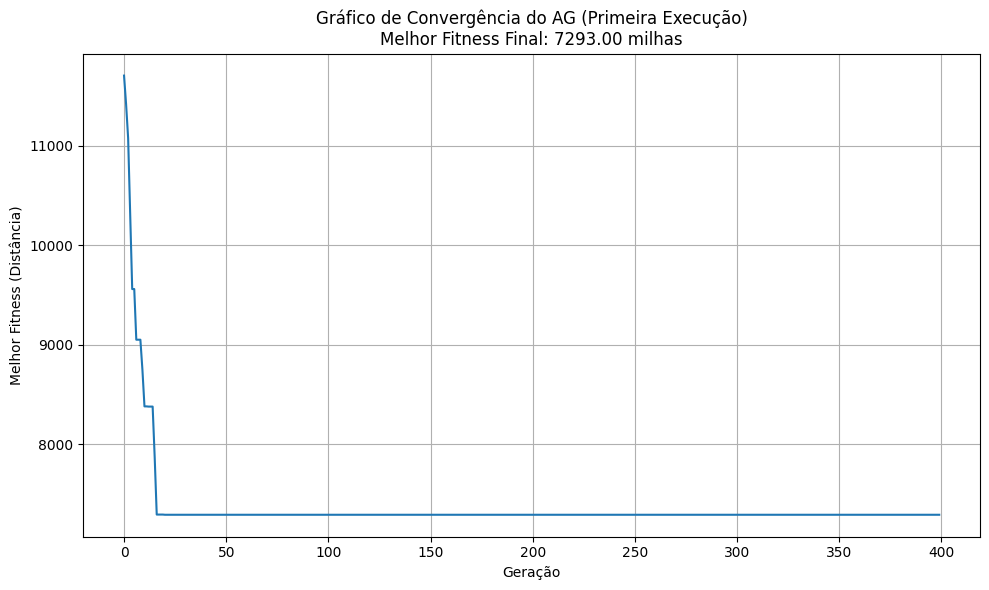

---------------------

bloxpot resultados finais


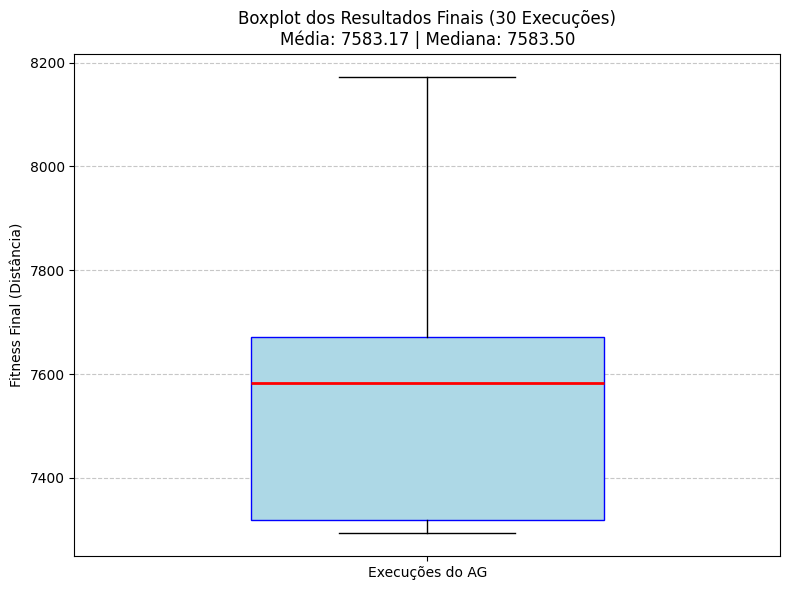

In [20]:
# analise dos resultados

media_fitness = np.mean(resultados_finais_fitness)
desvio_padrao_fitness = np.std(resultados_finais_fitness)
mediana_fitness = np.median(resultados_finais_fitness)
pior_resultado_geral = np.max(resultados_finais_fitness)

print("\n--- Análise Estatística (30 Execuções) ---")
print(f"Média do Fitness Final: {media_fitness:.2f} milhas")
print(f"Desvio Padrão do Fitness: {desvio_padrao_fitness:.2f} milhas")
print(f"Mediana do Fitness Final: {mediana_fitness:.2f} milhas")
print(f"Melhor Resultado (min): {melhor_fitness_geral:.2f} milhas")
print(f"Pior Resultado (max): {pior_resultado_geral:.2f} milhas")

if melhor_individuo_geral:
    rota_formatada = "New York -> " + " -> ".join([CIDADES[i] for i in melhor_individuo_geral]) + " -> New York"
    print(f"\nMelhor Rota Geral Encontrada (Distância: {melhor_fitness_geral:.2f} milhas):")
    print(rota_formatada)
else:
    print("\nNenhuma rota válida foi encontrada.")

print("\nGráfico de Convergência")
plt.figure(figsize=(10, 6))
plt.plot(historico_primeira_execucao)
plt.title(f'Gráfico de Convergência do AG (Primeira Execução)\nMelhor Fitness Final: {historico_primeira_execucao[-1]:.2f} milhas')
plt.xlabel('Geração')
plt.ylabel('Melhor Fitness (Distância)')
plt.grid(True)
plt.tight_layout()
plt.show()

print("---------------------")
print("\nbloxpot resultados finais")
plt.figure(figsize=(8, 6))
plt.boxplot(resultados_finais_fitness, widths=0.5, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red', linewidth=2))

plt.title(f'Boxplot dos Resultados Finais (30 Execuções)\nMédia: {media_fitness:.2f} | Mediana: {mediana_fitness:.2f}')
plt.ylabel('Fitness Final (Distância)')
plt.xticks([1], ['Execuções do AG'])
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()